# Mini Project 2
Ben Heinze
Braxton McCormack
Michael Hagin

In [34]:
import pandas as pd
import networkx as nx
import numpy as np

file_path = 'datasets/congress.edgelist'

G = nx.read_edgelist(file_path, create_using=nx.Graph())

'''
Part 2 implies that our graph should be undirected, unweighted, with no pararell edges or loops.
According to google using networkx graph objects means the pararell edges won't matter so the below code removes loops (if there is any)
'''
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Graph with {num_nodes} nodes and {num_edges} edges")
'''
I just wanted to mess around and see how I would go about making methods that interact with the network x. This
is the first method from part 2 I think you can write your own I just wanted to see if it was possible. The one directly after this
one though looks more complex.
'''
def number_of_vertices(G, vertex_index):
    return len(list(G.neighbors(vertex_index)))

example_vertex = '99' #another reason I liked this dataset is the nodes are just names of things (has to be lowercase)

# Use the function to find the degree of the specified vertex
degree_of_vertex = number_of_vertices(G, example_vertex)

print(degree_of_vertex)

betweenness_centrality = nx.betweenness_centrality(G)
node_with_highest_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)
print(node_with_highest_betweenness)

Graph with 475 nodes and 10222 edges
23
367


In [50]:
#4 BH
def number_of_vertices(edges):
    vertices = set()
    for i in edges:
        vertices.add(i[0])
        vertices.add(i[1])
    print("4. Total number of vertices: ", len(vertices))
#5 BH
def degree_of_vertex(edges, vertex_index):
    degree = set()
    for i in edges:
        if (int(i[0]) == vertex_index):
            degree.add(i[1])
        elif (int(i[1]) == vertex_index):
            degree.add(i[0])
    print(f"5. Degree of vertex {vertex_index}: ", len(degree))
#6 BH
def clustering_coefficient_of_vertex(edges, vertex_index):
    neighborEdgeList = set()    #edgeList 
    neighborLabels = set()      #just vertices

    #creates a set of every neighbor of a given vertex, and degree of vertex
    for i in edges:
        if (int(i[0]) == vertex_index):
            neighborLabels.add(i[1])
            neighborEdgeList.add(i)
        elif (int(i[1]) == vertex_index):
            neighborLabels.add(i[0])
            neighborEdgeList.add(i)

    # degree of vertex
    kv = len(neighborEdgeList)  
    #removes divide by zero error that can happen if a degree is 1 or less
    if kv <= 1:
        return None
    
    #number of edges between neighbors of V
    nv = 0  

    #counts number of neighbor edges
    for v1 in neighborLabels:
        for v2 in neighborLabels:
            if v1 < v2:
                for edge in edges:
                    if v1 == edge[0] and v2 == edge[1]:
                        nv +=1
                    elif v2 == edge[0] and v1 == edge[1]:
                        nv+=1
    cc_v = (2*nv) / ((kv) * (kv-1))
    print(f"6. Clustering coefficient of vertex {vertex_index}: " ,cc_v)
#7 BM
def betweenness_centrality_of_vertex(edges, vertex_index):
    

    print(f"7. Betweenness Centrality of Vertex {vertex_index}: ")
    return

#8 BH
def average_shortest_path_length(edges, G):
    avg = 0
    for s in G.nodes():
        for t in G.nodes():
            if s != t:
                avg += ( (nx.shortest_path_length(G, s, t)) / (len(G)*(len(G)-1)) )   
    print("8. Average shortest Path Length: ", avg)

#9 BH
def adjacency_matrix(edges):
    s = set()
    print(edges)
    #get number of nodes:
    for edge in edges:
        s.add(edge[0])
        s.add(edge[1])
    #creates NxN matrix
    adj = np.empty((len(s), len(s)))
    for edge in edges:
        row = edge[0]
        col = edge[1]
        adj[int(row)][int(col)] = 1

    print("9. Adjacency Matrix:")
    print(adj)
    return

#10 BH
def eigenvector_centrality(adjacency_matrix):

    print("10. Number of vertices: ")
    return

# number_of_vertices(G.edges())
# degree_of_vertex(G.edges(), 111)
# clustering_coefficient_of_vertex(G.edges(), 260)
# betweenness_centrality_of_vertex(edges, vertex_index)
average_shortest_path_length(G.edges, G)
# adjacency_matrix(G.edges)
# eigenvector_centrality(adjacency_matrix)

AttributeError: 'tuple' object has no attribute 'decode'

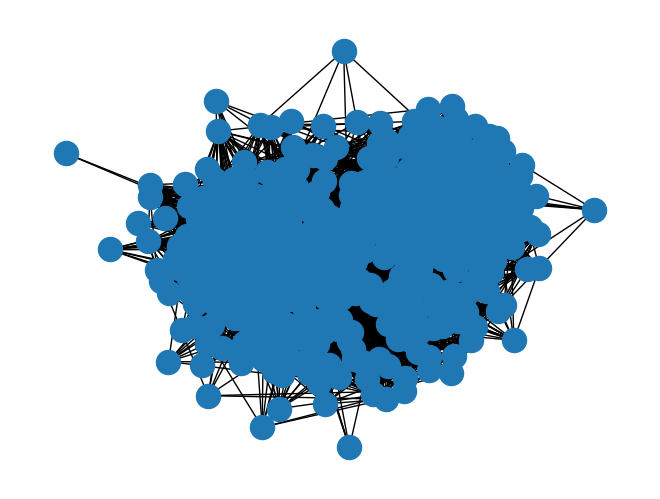

In [36]:
'''
Part 3

Question 11
'''
nx.draw(G) # create a visualization of the data

In [37]:
'''
Question 12
'''

print("10 nodes with the highest degree: \n")
for i in G:                       # for every item in G, if it's above a certain
    if (G.degree[i] - 110) > 0:   # threshold, print the node and degree
        print("Node number " + i, "has a degree of", G.degree[i])

10 nodes with the highest degree: 

Node number 254 has a degree of 142
Node number 111 has a degree of 120
Node number 393 has a degree of 129
Node number 190 has a degree of 127
Node number 367 has a degree of 214
Node number 192 has a degree of 113
Node number 322 has a degree of 181
Node number 269 has a degree of 112
Node number 208 has a degree of 134
Node number 385 has a degree of 111


In [38]:
'''
Question 13
'''

print("10 nodes with the highest betweeness centrality: \n")
x = nx.betweenness_centrality(G)
for i in x:                        # for every item in G above a certain threshold,
    if x[i] > 0.0130:              # print the node and betweenness centrality
        print("Node " + i, "has a betweennes centrality of",  x[i])



10 nodes with the highest betweeness centrality: 

Node 17 has a betweennes centrality of 0.014895064503188359
Node 254 has a betweennes centrality of 0.022622535590667927
Node 71 has a betweennes centrality of 0.01377085766816814
Node 393 has a betweennes centrality of 0.013559463845965472
Node 190 has a betweennes centrality of 0.01304835098949867
Node 367 has a betweennes centrality of 0.06862644524670267
Node 92 has a betweennes centrality of 0.013185269844357143
Node 461 has a betweennes centrality of 0.013285379463926878
Node 322 has a betweennes centrality of 0.03718289232722759
Node 208 has a betweennes centrality of 0.01545860745624782


In [39]:
'''
Question 14
'''
print("10 nodes with the highest clustering coefficient (no ties): \n")
x = nx.clustering(G)
for i in x:                        # for every item in G above a certain threshold,
    if x[i] > 0.52:                # print the node and clustering coefficient
        print("Node " + i, "has a clustering coefficient of",  x[i])


10 nodes with the highest clustering coefficient (no ties): 

Node 260 has a clustering coefficient of 0.5246305418719212
Node 101 has a clustering coefficient of 0.5252525252525253
Node 241 has a clustering coefficient of 0.5238095238095238
Node 131 has a clustering coefficient of 0.525
Node 159 has a clustering coefficient of 0.5358974358974359
Node 337 has a clustering coefficient of 0.5645645645645646
Node 228 has a clustering coefficient of 0.580952380952381
Node 206 has a clustering coefficient of 0.5287356321839081
Node 158 has a clustering coefficient of 0.5907692307692308
Node 227 has a clustering coefficient of 0.5824175824175825


In [40]:
'''
Question 15
'''

print("10 nodes with the highest eigenvector centrality: \n")
x = nx.eigenvector_centrality(G)
for i in x:
    if x[i] > 0.095:
        print("Node " + i, "has an eigenvector centrality of",  x[i])

10 nodes with the highest eigenvector centrality: 

Node 254 has an eigenvector centrality of 0.12163375711583706
Node 111 has an eigenvector centrality of 0.10782079735109976
Node 393 has an eigenvector centrality of 0.1116015311639707
Node 190 has an eigenvector centrality of 0.1049903521264594
Node 367 has an eigenvector centrality of 0.1874548636669971
Node 92 has an eigenvector centrality of 0.09553476874991108
Node 461 has an eigenvector centrality of 0.10160701007549314
Node 322 has an eigenvector centrality of 0.14685452461691043
Node 269 has an eigenvector centrality of 0.09812027110779005
Node 208 has an eigenvector centrality of 0.11016963834188911


In [41]:
'''
Question 16
'''

print("10 nodes with the highest Pagerank: \n")
x = nx.pagerank(G)
for i in x:                     # for every node above a certain threshold,
    if x[i] > .005:             # print the node and the Pagerank
        print("Node " + i, "has a Pagerank of",  x[i])

10 nodes with the highest Pagerank: 

Node 393 has a Pagerank of 0.0064796415848055134
Node 335 has a Pagerank of 0.005371910416990585
Node 389 has a Pagerank of 0.005398301251486948
Node 367 has a Pagerank of 0.006651882865207782
Node 192 has a Pagerank of 0.005218096783465587
Node 322 has a Pagerank of 0.012032354694664725
Node 269 has a Pagerank of 0.0061335255389171756
Node 399 has a Pagerank of 0.006738392448969913
Node 208 has a Pagerank of 0.006710563125799518
Node 436 has a Pagerank of 0.005223949724570414


In [42]:
'''
Question 17

The highly ranked nodes aren't mostly the same, but there are multiple nodes which are in the top 10 of one
category that are also in the top 10 of another category. For example, nodes 393, 111, 208, 192, and 92 are some 
of these nodes. The biggest differences in the rankings are 111-214 in the degree ranking, 0.013-0.069 in the 
betweenness centrality ranking, 0.524-0.591 in the clustering coefficient ranking, 0.098-0.187 in the eigenvector
centrality ranking, and 0.005-0.012 in the Pagerank ranking. Generally, it seems like there are pretty significant
differences between the top and bottom of the ranking list, with the exception of the clustering coeffieient
ranking, where there was a ~13% increase from top to bottom, where the rest of the rankings were almost double at
the lowest. I think this is the case because of Small-World Behavior, where many nodes in a set have fewer edges,
and a much smaller portion of nodes (hubs) have many edges that connect to multiple clusters of nodes.
'''


"\nQuestion 17\n\nThe highly ranked nodes aren't mostly the same, but there are multiple nodes which are in the top 10 of one\ncategory that are also in the top 10 of another category. For example, nodes 393, 111, 208, 192, and 92 are some \nof these nodes. The biggest differences in the rankings are 111-214 in the degree ranking, 0.013-0.069 in the \nbetweenness centrality ranking, 0.524-0.591 in the clustering coefficient ranking, 0.098-0.187 in the eigenvector\ncentrality ranking, and 0.005-0.012 in the Pagerank ranking. Generally, it seems like there are pretty significant\ndifferences between the top and bottom of the ranking list, with the exception of the clustering coeffieient\nranking, where there was a ~13% increase from top to bottom, where the rest of the rankings were almost double at\nthe lowest. I think this is the case because of Small-World Behavior, where many nodes in a set have fewer edges,\nand a much smaller portion of nodes (hubs) have many edges that connect to 

In [43]:
'''
Question 18
'''
print("Based on the result of", nx.average_shortest_path_length(G), "when computing the average shortest path length in the graph, this graph\ndoes exhibit small-world behavior")


Based on the result of 2.0638862980235397 when computing the average shortest path length in the graph, this graph
does exhibit small-world behavior


This graph does not seem to exhibit power law behavior


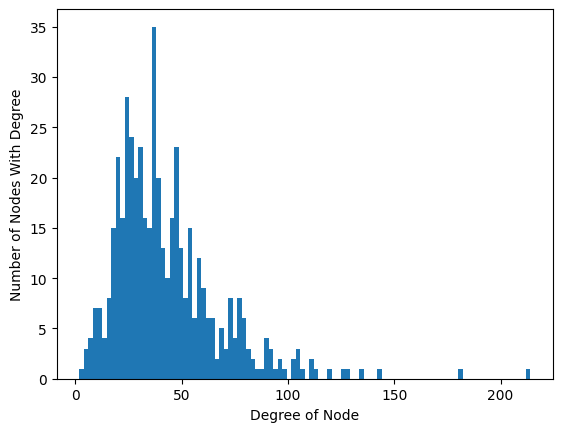

In [44]:
'''
Question 19
'''
import matplotlib.pyplot as plt           # import matplotlib to create a histogram
dict_degrees = dict(nx.degree(G))         # set x and y values
degree_vals = dict_degrees.values()       
degree_vals_vtx = dict_degrees.keys()
degvals = plt.hist(degree_vals, bins=100) # plot the histogram
plt.xlabel("Degree of Node")              # label x and y axes
plt.ylabel("Number of Nodes With Degree")

print("This graph does not seem to exhibit power law behavior")